# Importar librerias

In [1]:
import pandas as pd 
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt 

# Analisis de los datos 

In [2]:
df_salarie= pd.read_csv('data/linkedin-jobs-usa.csv')

In [ ]:
df_salarie.info()  # bsucamos tipos de datos y una vista general 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845 entries, 0 to 2844
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          2845 non-null   object
 1   company        2845 non-null   object
 2   description    2845 non-null   object
 3   onsite_remote  2845 non-null   object
 4   salary         929 non-null    object
 5   location       2845 non-null   object
 6   criteria       2845 non-null   object
 7   posted_date    2845 non-null   object
 8   link           2845 non-null   object
dtypes: object(9)
memory usage: 200.2+ KB


In [ ]:
df_salarie.shape # filas y columnas

(2845, 9)

In [6]:
df_salarie.head(5)

,title,company,description,onsite_remote,salary,location,criteria,posted_date,link
0,Data Analyst - Recent Graduate,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,NaN,Buffalo-Niagara Falls Area,"[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-22,https://www.linkedin.com/jobs/view/data-analys...
1,Data Analyst - Recent Graduate,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,NaN,"San Jose, CA","[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-22,https://www.linkedin.com/jobs/view/data-analys...
2,Data Analyst,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,NaN,"Texas, United States","[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-17,https://www.linkedin.com/jobs/view/data-analys...
3,Data Analyst,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,NaN,"Illinois, United States","[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-17,https://www.linkedin.com/jobs/view/data-analys...
4,Entry-Level Data Analyst,The Federal Savings Bank,"The Federal Savings Bank, a national bank and ...",onsite,NaN,"Chicago, IL","[{'Seniority level': 'Entry level'}, {'Employm...",2022-11-17,https://www.linkedin.com/jobs/view/entry-level...


# Procesamiento de datos

In [9]:
# contar duplicados 
duplicados_df = df_salarie.duplicated()

# Mostrar los duplicados si existen
if duplicados_df.any():
    print("Hay duplicados en el DataFrame. Las filas duplicadas son:")
    print(df_salarie[duplicados_df])
else:
    print("No hay duplicados en el DataFrame.")

No hay duplicados en el DataFrame.


In [10]:
# contamos nulos 
df_salarie.isnull().sum() 

title               0
company             0
description         0
onsite_remote       0
salary           1916
location            0
criteria            0
posted_date         0
link                0
dtype: int64

la fila salry tiene demasiados valores nulos una de las fromas que podemos trabajar con ella es eliminandola por completo podemos utilizar:

* eliminar las filas con valores nulos  df_salarie_sin_nulos = df_salarie.dropna()
* elimar la columna con valores nulos   df_salarie_sin_colum = df_salarie.dropna(axis=1)


pero para este caso vamos a remplazar por la media para no perder todos esos registros 


In [11]:
df_salarie['salary']

0                                                     NaN
1                                                     NaN
2                                                     NaN
3                                                     NaN
4                                                     NaN
                              ...                        
2840                                                  NaN
2841    $75,000.00\r\n            -\r\n            $95...
2842                                                  NaN
2843    $85,000.00\r\n            -\r\n            $95...
2844    $130,000.00\r\n            -\r\n            $1...
Name: salary, Length: 2845, dtype: object

para la media de salary es necesario hacer un cambio de tipo de dato ya que este viene como un string y no podremos calcular la media 

* Este código toma una columna 'salary' que contiene valores de salario, elimina cualquier caracter no numérico, extrae los dígitos y convierte la columna resultante en valores numéricos de tipo float.
* El resultado se almacena en una nueva columna llamada 'salary_num'.
 Esto es útil cuando la columna 'salary' inicial contiene caracteres no numéricos y se quiere trabajar con los salarios como valores numéricos.

In [12]:
df_salarie['salary_num'] = df_salarie['salary'].str.replace(r'[^\d.]', '', regex=True).str.extract('(\d+)').astype(float)

In [13]:
df_salarie['salary_num'].describe()

count       929.000000
mean      47949.630786
std       47330.459576
min          22.000000
25%          40.000000
50%       60000.000000
75%       85000.000000
max      130000.000000
Name: salary_num, dtype: float64

In [14]:
df_salarie.isnull().sum() 

title               0
company             0
description         0
onsite_remote       0
salary           1916
location            0
criteria            0
posted_date         0
link                0
salary_num       1916
dtype: int64

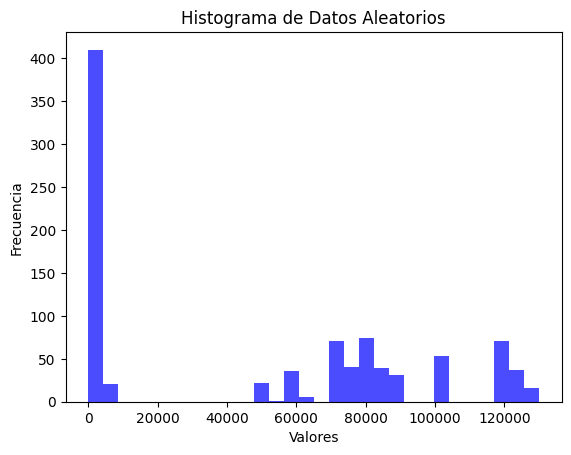

In [ ]:
# Crear un histograma
plt.hist(df_salarie['salary_num'], bins=30, color='blue', alpha=0.7)

# Añadir etiquetas y título
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma')

# Mostrar el histograma
plt.show()

tenemos una distribucion cero equilibrada por lo que revisando en datset vemos que la columna salary esta muy sucia ya que viene salarios anuales,mensuales y por dia en uno mismo por lo que no nos ayuda a tener una buena distribucion.

In [19]:
#eliminare las filas que tengas un salario mayor o igual a 20,000
df_salarie = df_salarie[df_salarie['salary_num'] >= 20000]

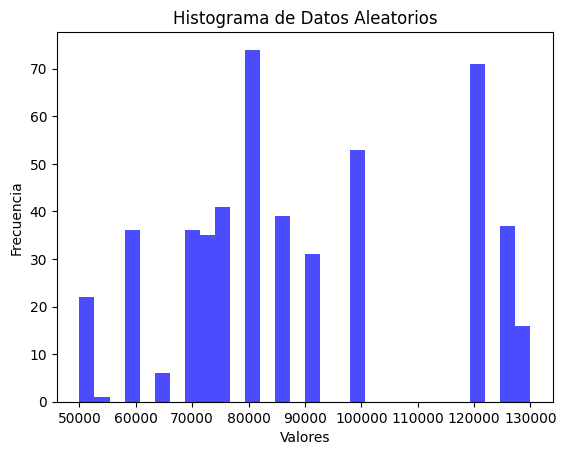

In [ ]:
# Crear un histograma
plt.hist(df_salarie['salary_num'], bins=30, color='blue', alpha=0.7)

# Añadir etiquetas y título
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma de Datos')

# Mostrar el histograma
plt.show()

In [21]:
#remplazaremos valores nulos con la media y eliminaremos la columna salary que no queremos 

df_salarie = df_salarie.fillna(df_salarie['salary_num'].mean())

df_salarie.drop('salary',axis=1,inplace=True)

In [22]:
df_salarie.isnull().sum() 

title            0
company          0
description      0
onsite_remote    0
location         0
criteria         0
posted_date      0
link             0
salary_num       0
dtype: int64

In [23]:
df_salarie.head(5)

,title,company,description,onsite_remote,location,criteria,posted_date,link,salary_num
8,Data Analyst,London Approach,The ideal candidate for the Data Analyst/Finan...,onsite,"Franklin, TN","[{'Seniority level': 'Associate'}, {'Employmen...",2022-11-21,https://www.linkedin.com/jobs/view/data-analys...,100000.0
24,Data Analyst,"Eva Garland Consulting, LLC","Reporting to the Director of Operations, the D...",onsite,"Raleigh, NC","[{'Seniority level': 'Entry level'}, {'Employm...",2022-11-22,https://www.linkedin.com/jobs/view/data-analys...,50000.0
35,Data Analyst,London Approach,The ideal candidate for the Data Analyst/Finan...,onsite,"Franklin, TN","[{'Seniority level': 'Associate'}, {'Employmen...",2022-11-21,https://www.linkedin.com/jobs/view/data-analys...,100000.0
61,Data Analyst,London Approach,The ideal candidate for the Data Analyst/Finan...,onsite,"Franklin, TN","[{'Seniority level': 'Associate'}, {'Employmen...",2022-11-21,https://www.linkedin.com/jobs/view/data-analys...,100000.0
88,Data Analyst,London Approach,The ideal candidate for the Data Analyst/Finan...,onsite,"Franklin, TN","[{'Seniority level': 'Associate'}, {'Employmen...",2022-11-21,https://www.linkedin.com/jobs/view/data-analys...,100000.0


In [ ]:
# df_salarie.to_csv('data/linkeding-jobs-usa-clean.csv',index=False)